### Training YOLOv8
---


GPU access verification

In [1]:
!nvidia-smi

Tue Aug  6 15:47:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installation of YOLOv8 ( pip )

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

Dataset Upload

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jPCXLMBZJU137MRBek9F")
project = rf.workspace("foreignobjectaerodromes").project("o.d-in-bad-weather")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to O.D-IN-BAD-WEATHER-1 in yolov8:: 100%|██████████| 2312/2312 [00:00<00:00, 4936.68it/s]


Training with Dataset

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/O.D-IN-BAD-WEATHER-1/data.yaml epochs=25 imgsz=640 batch=16 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/O.D-IN-BAD-WEATHER-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visu

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


#### Training Results


---



Confusion Matrix

In [10]:
from IPython.display import Image

/content


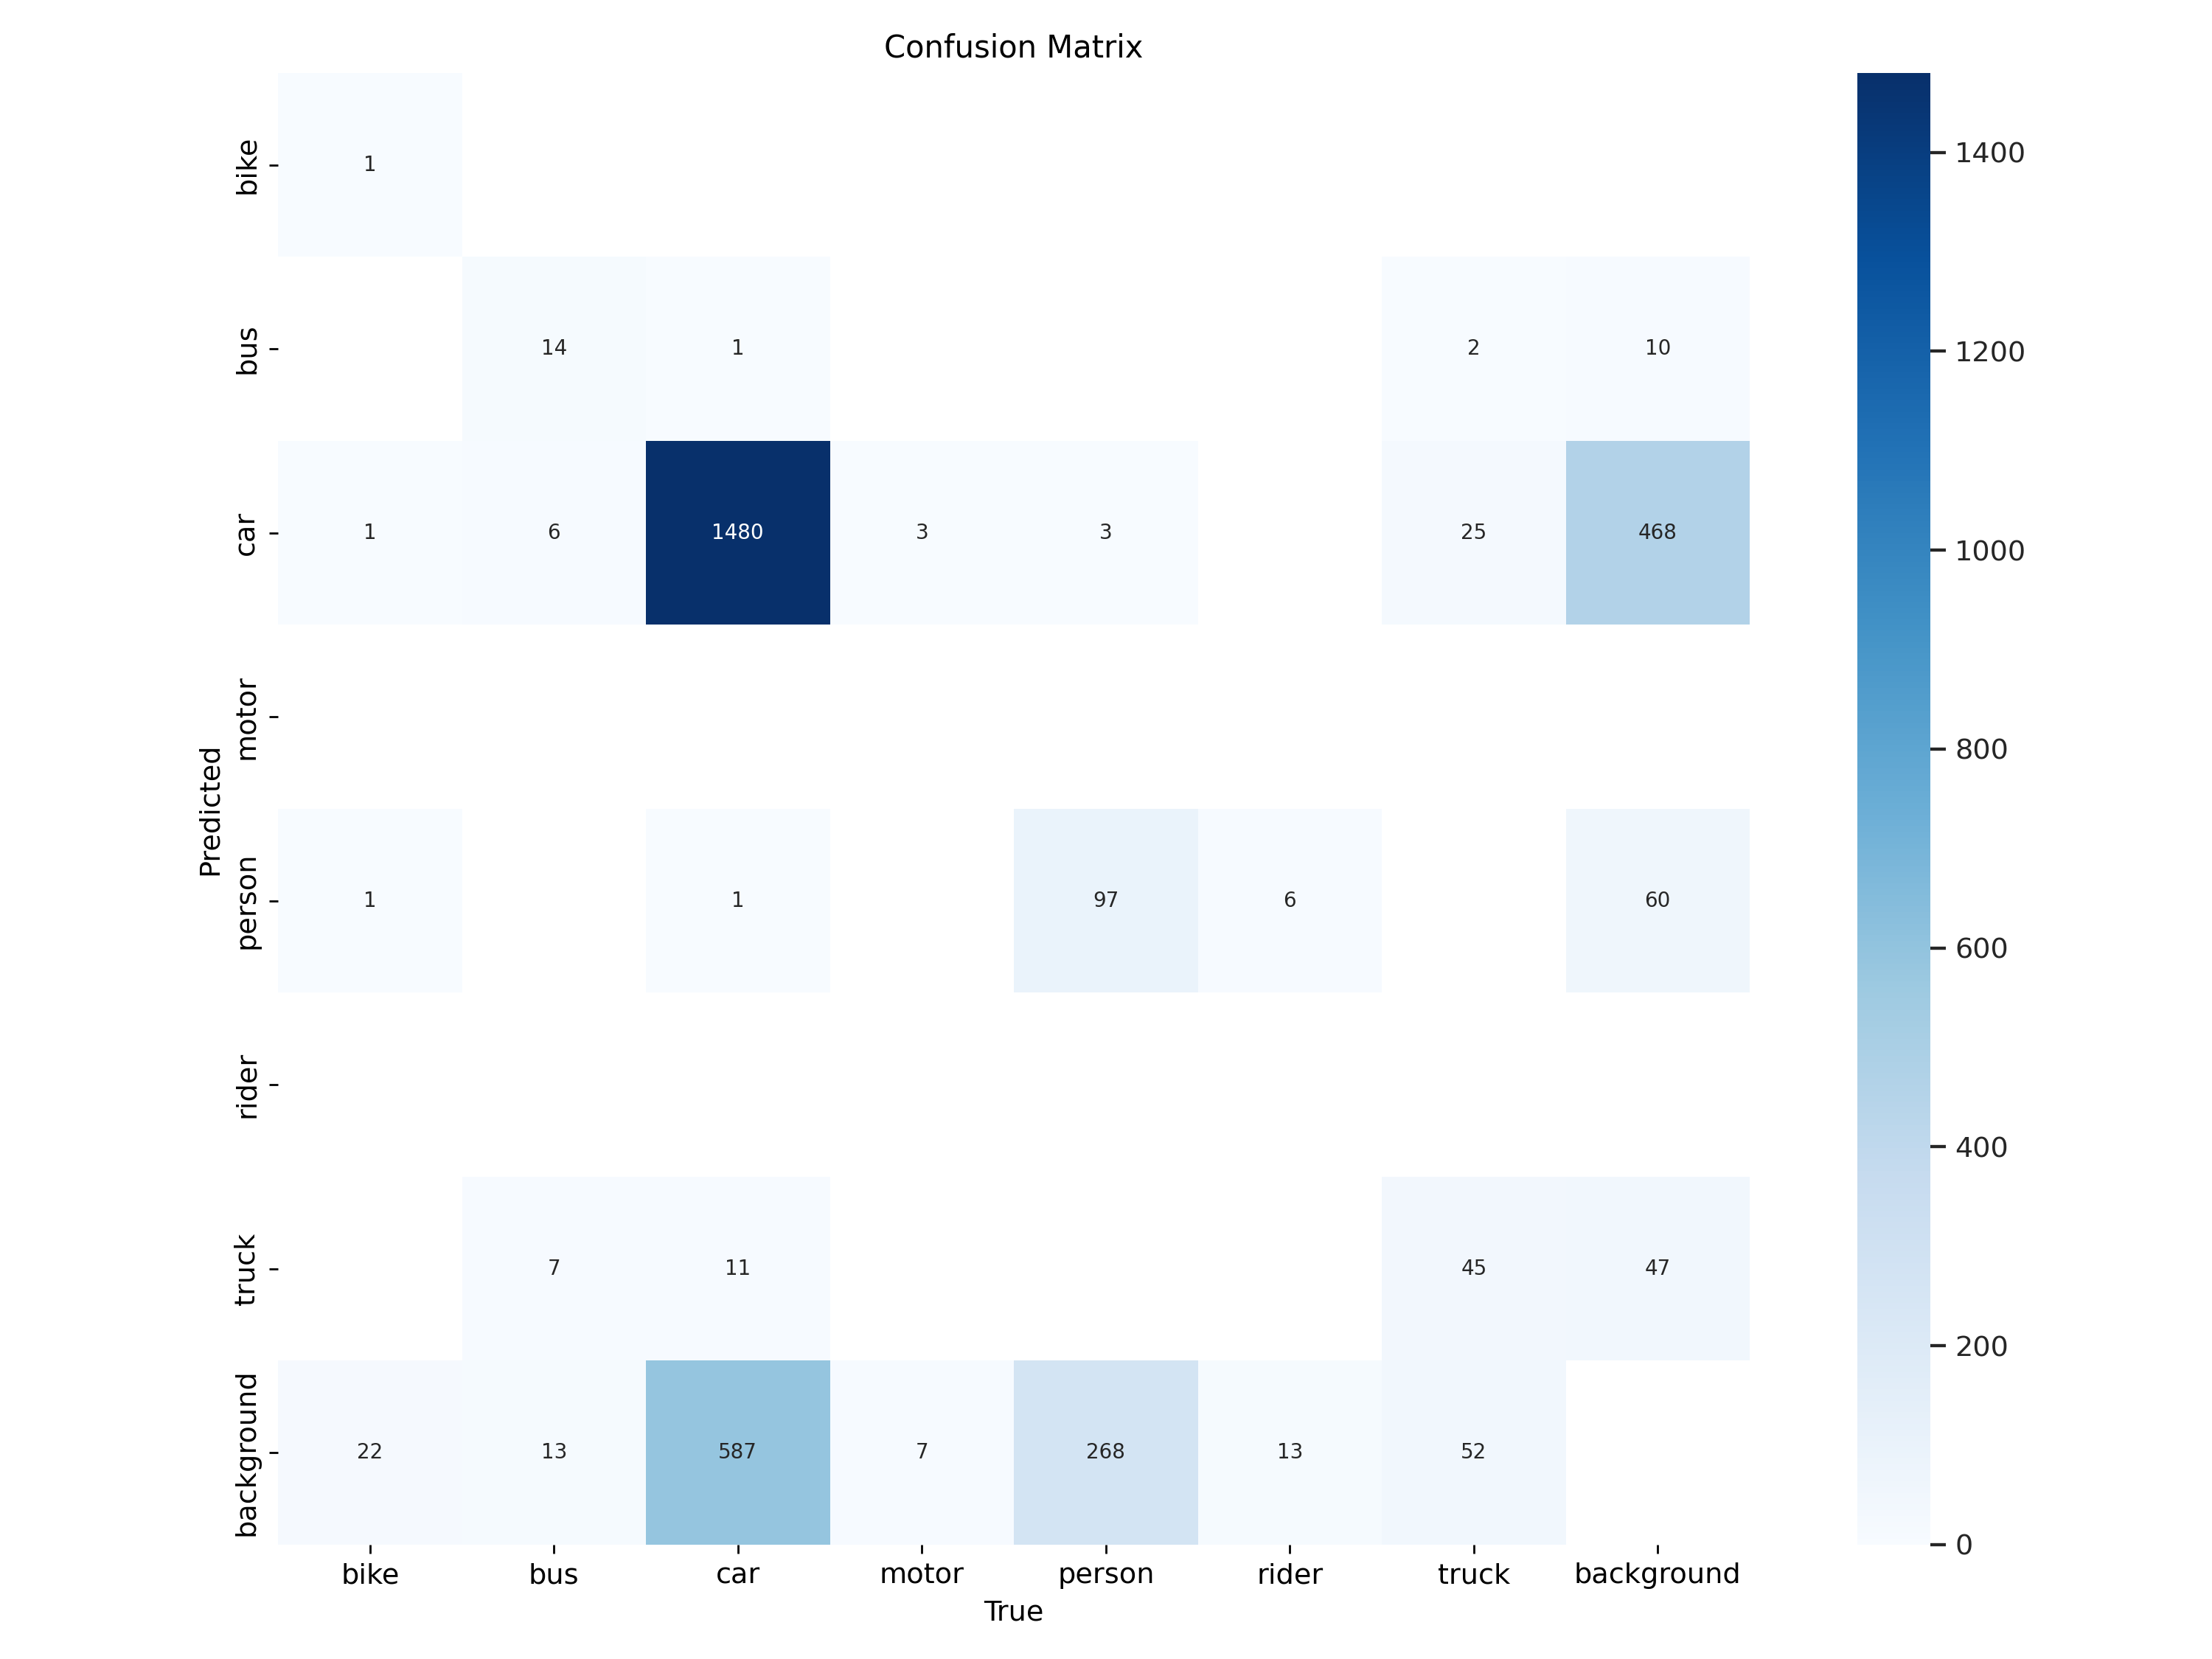

In [11]:
%cd {HOME}

Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=1000)


 Results

/content


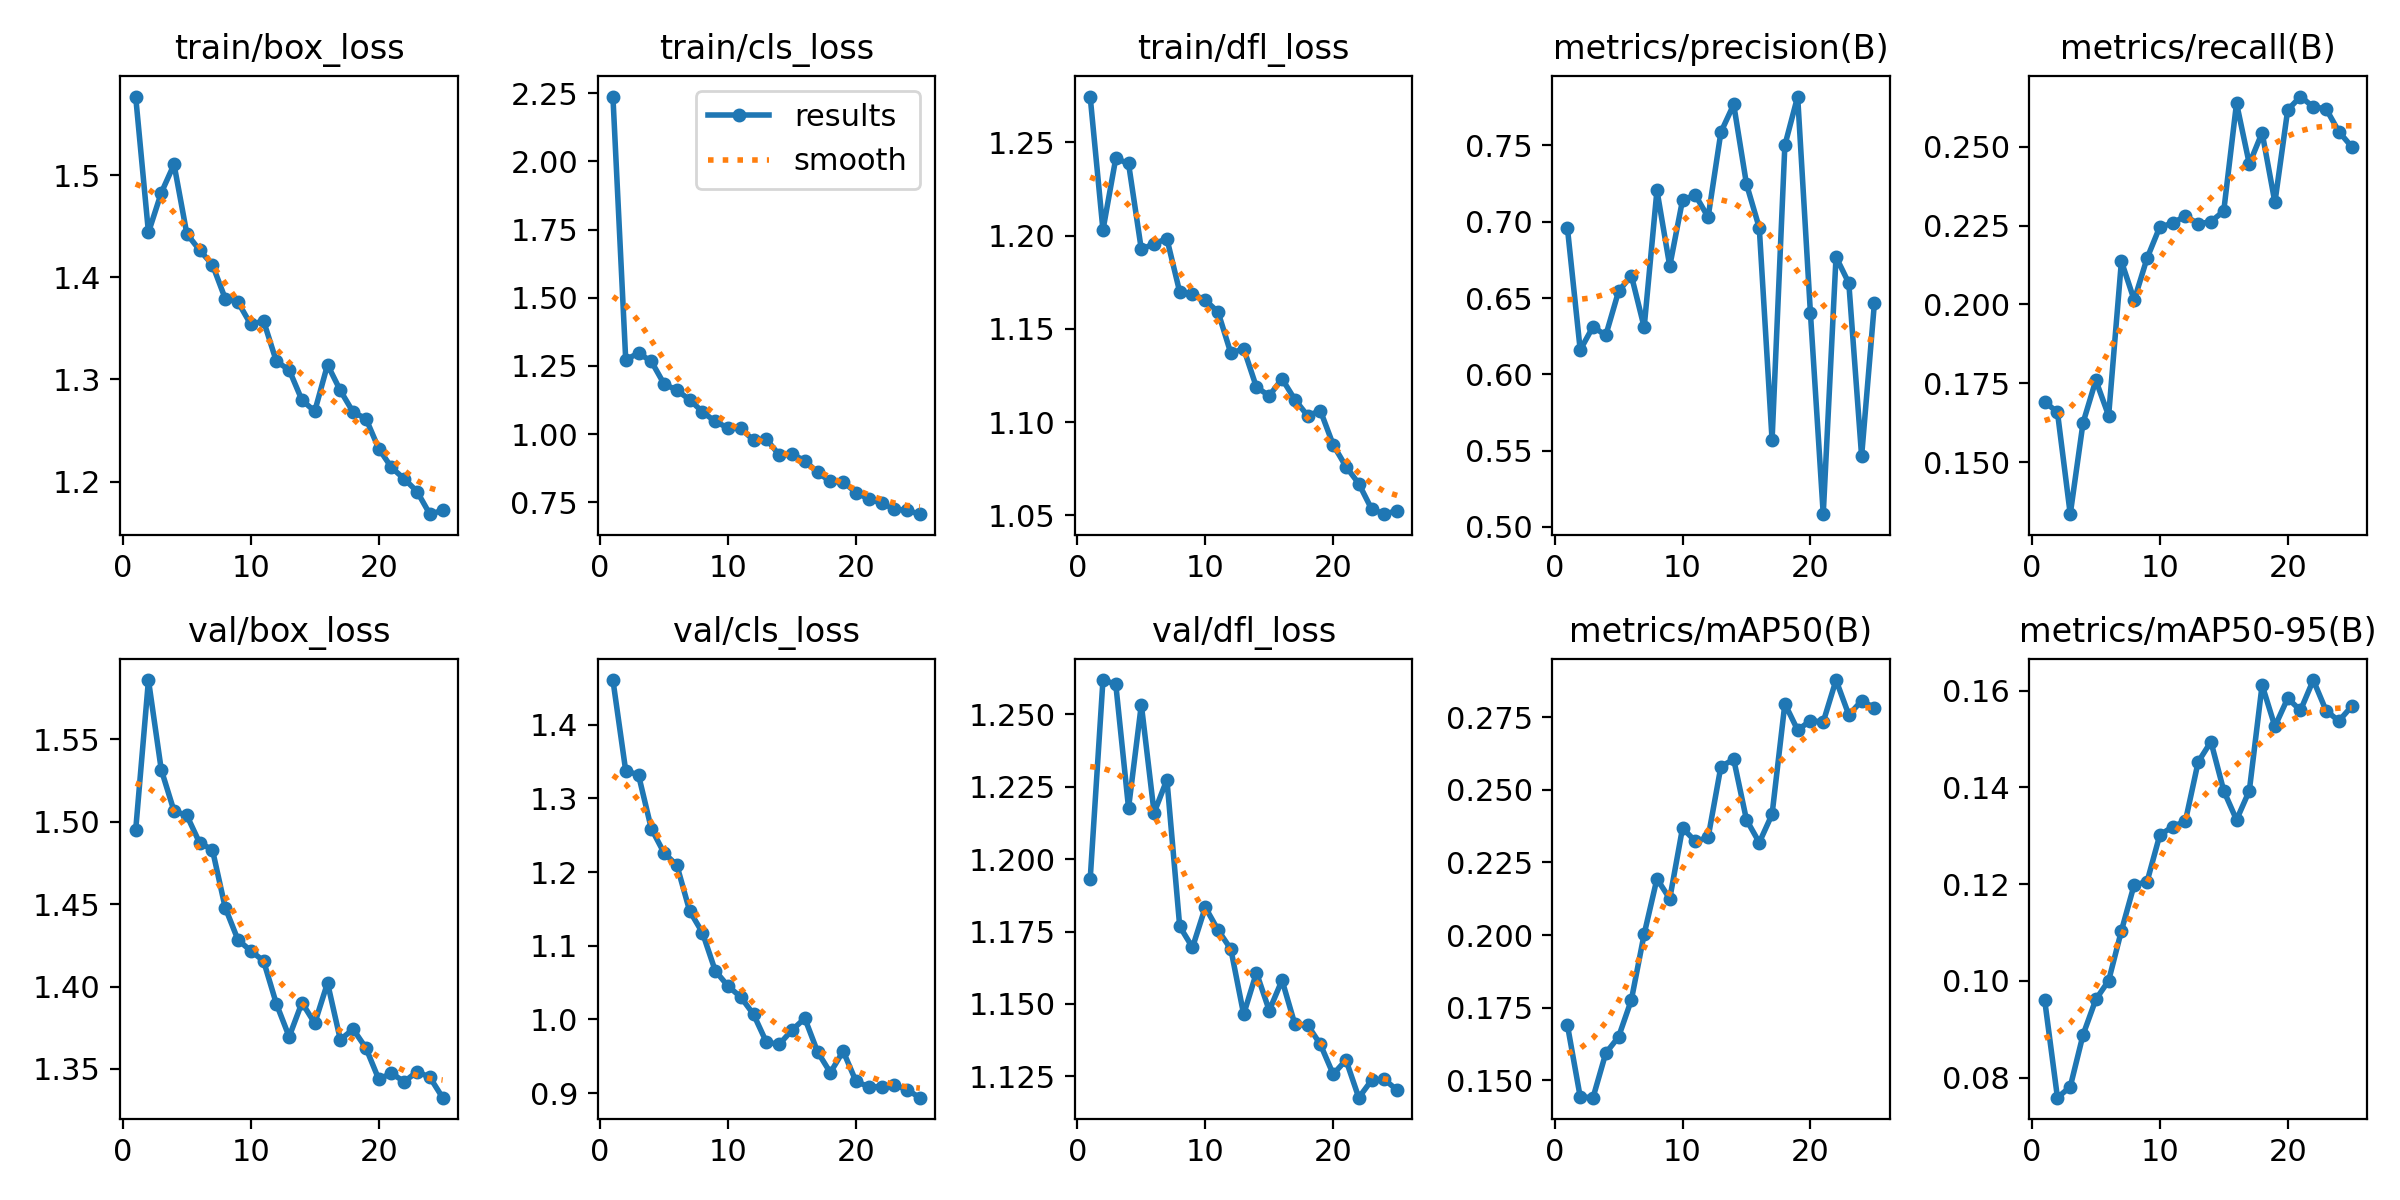

In [13]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/results.png', width=1000)

/content


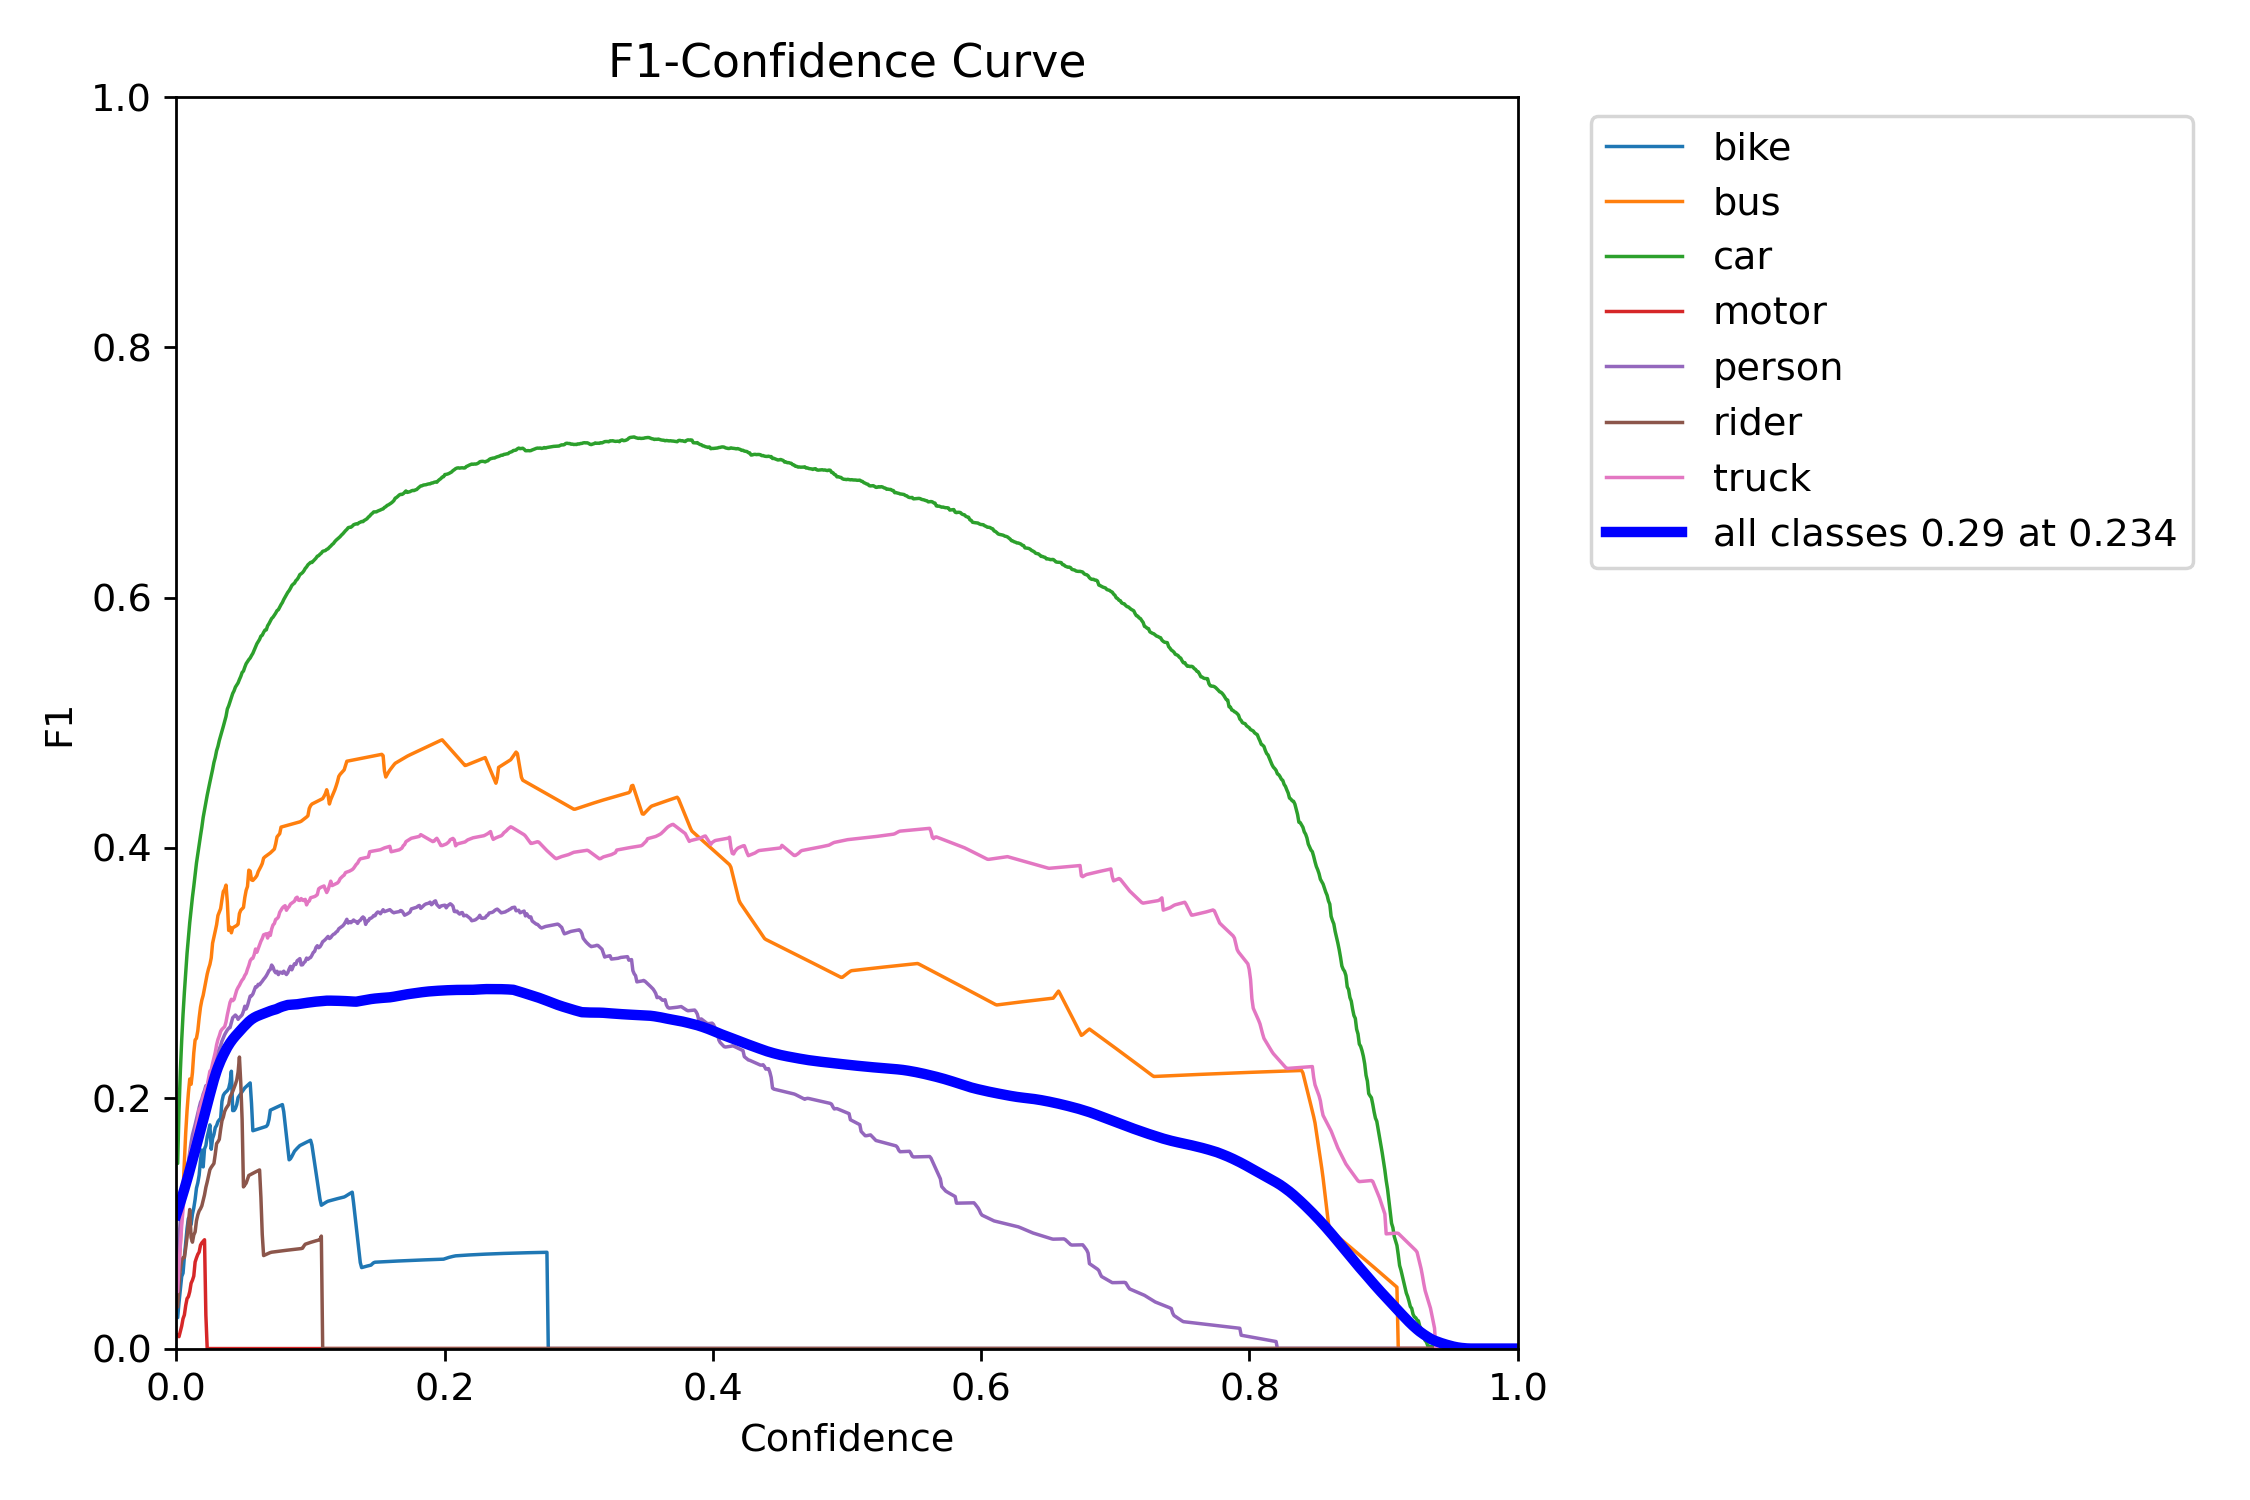

In [14]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/F1_curve.png', width=1000)

/content


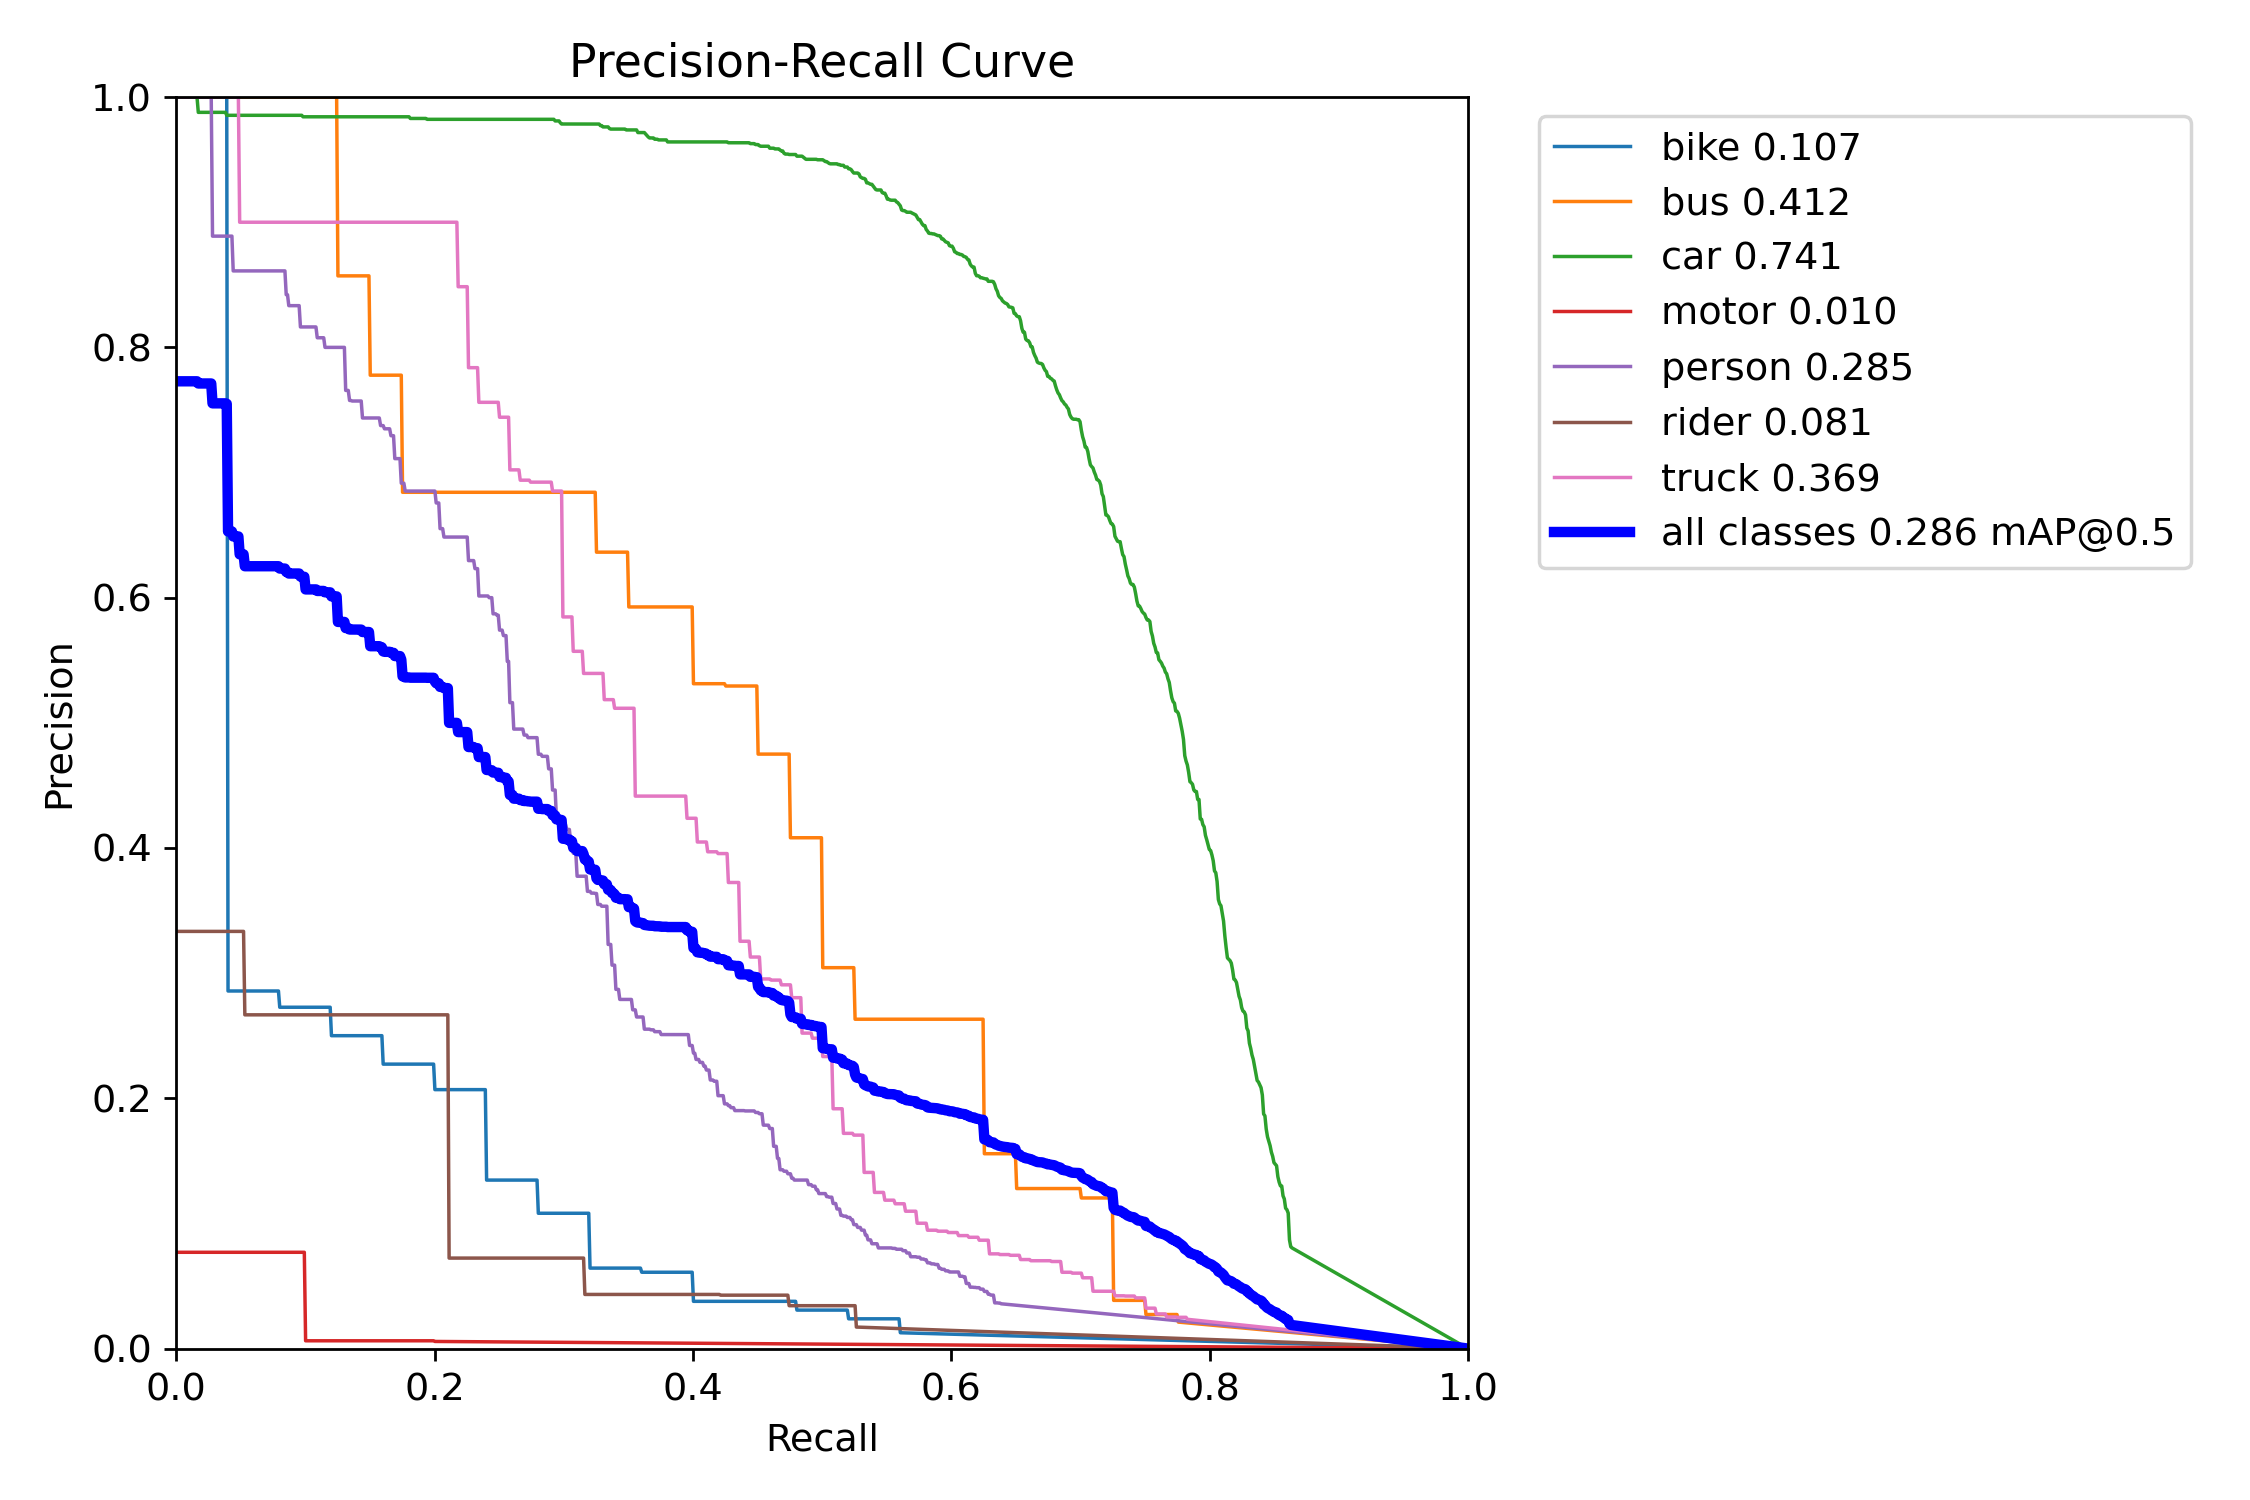

In [15]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/PR_curve.png', width=1000)

/content


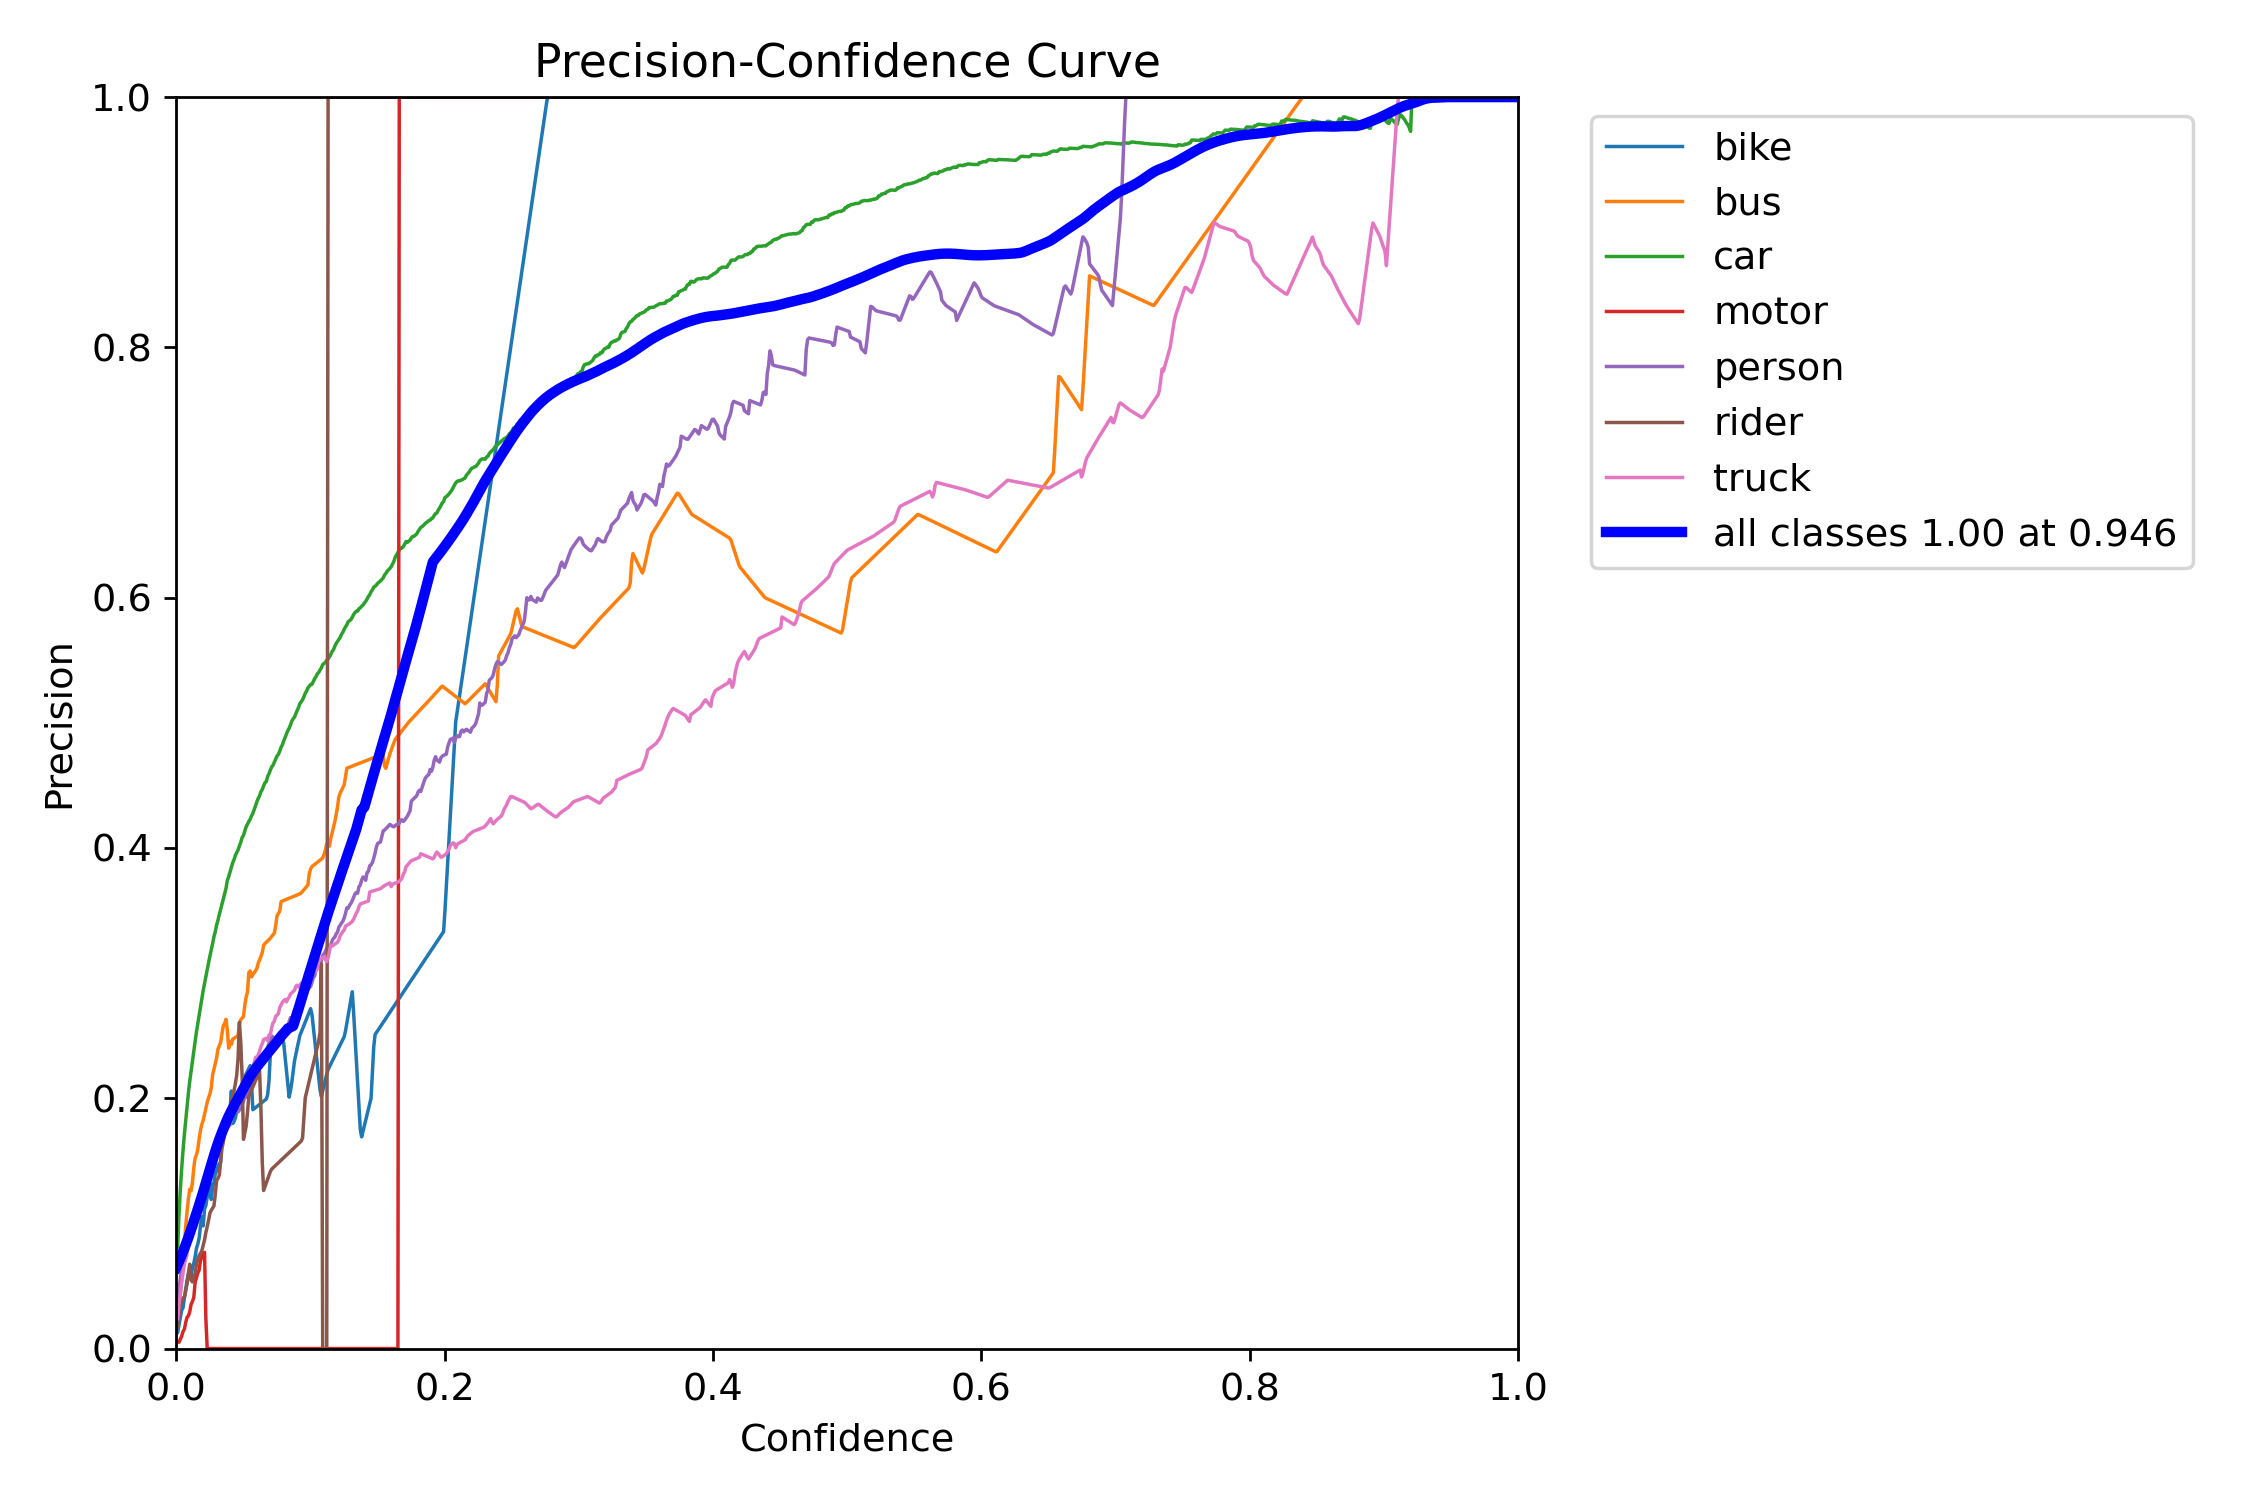

In [16]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/P_curve.png', width=1000)

/content


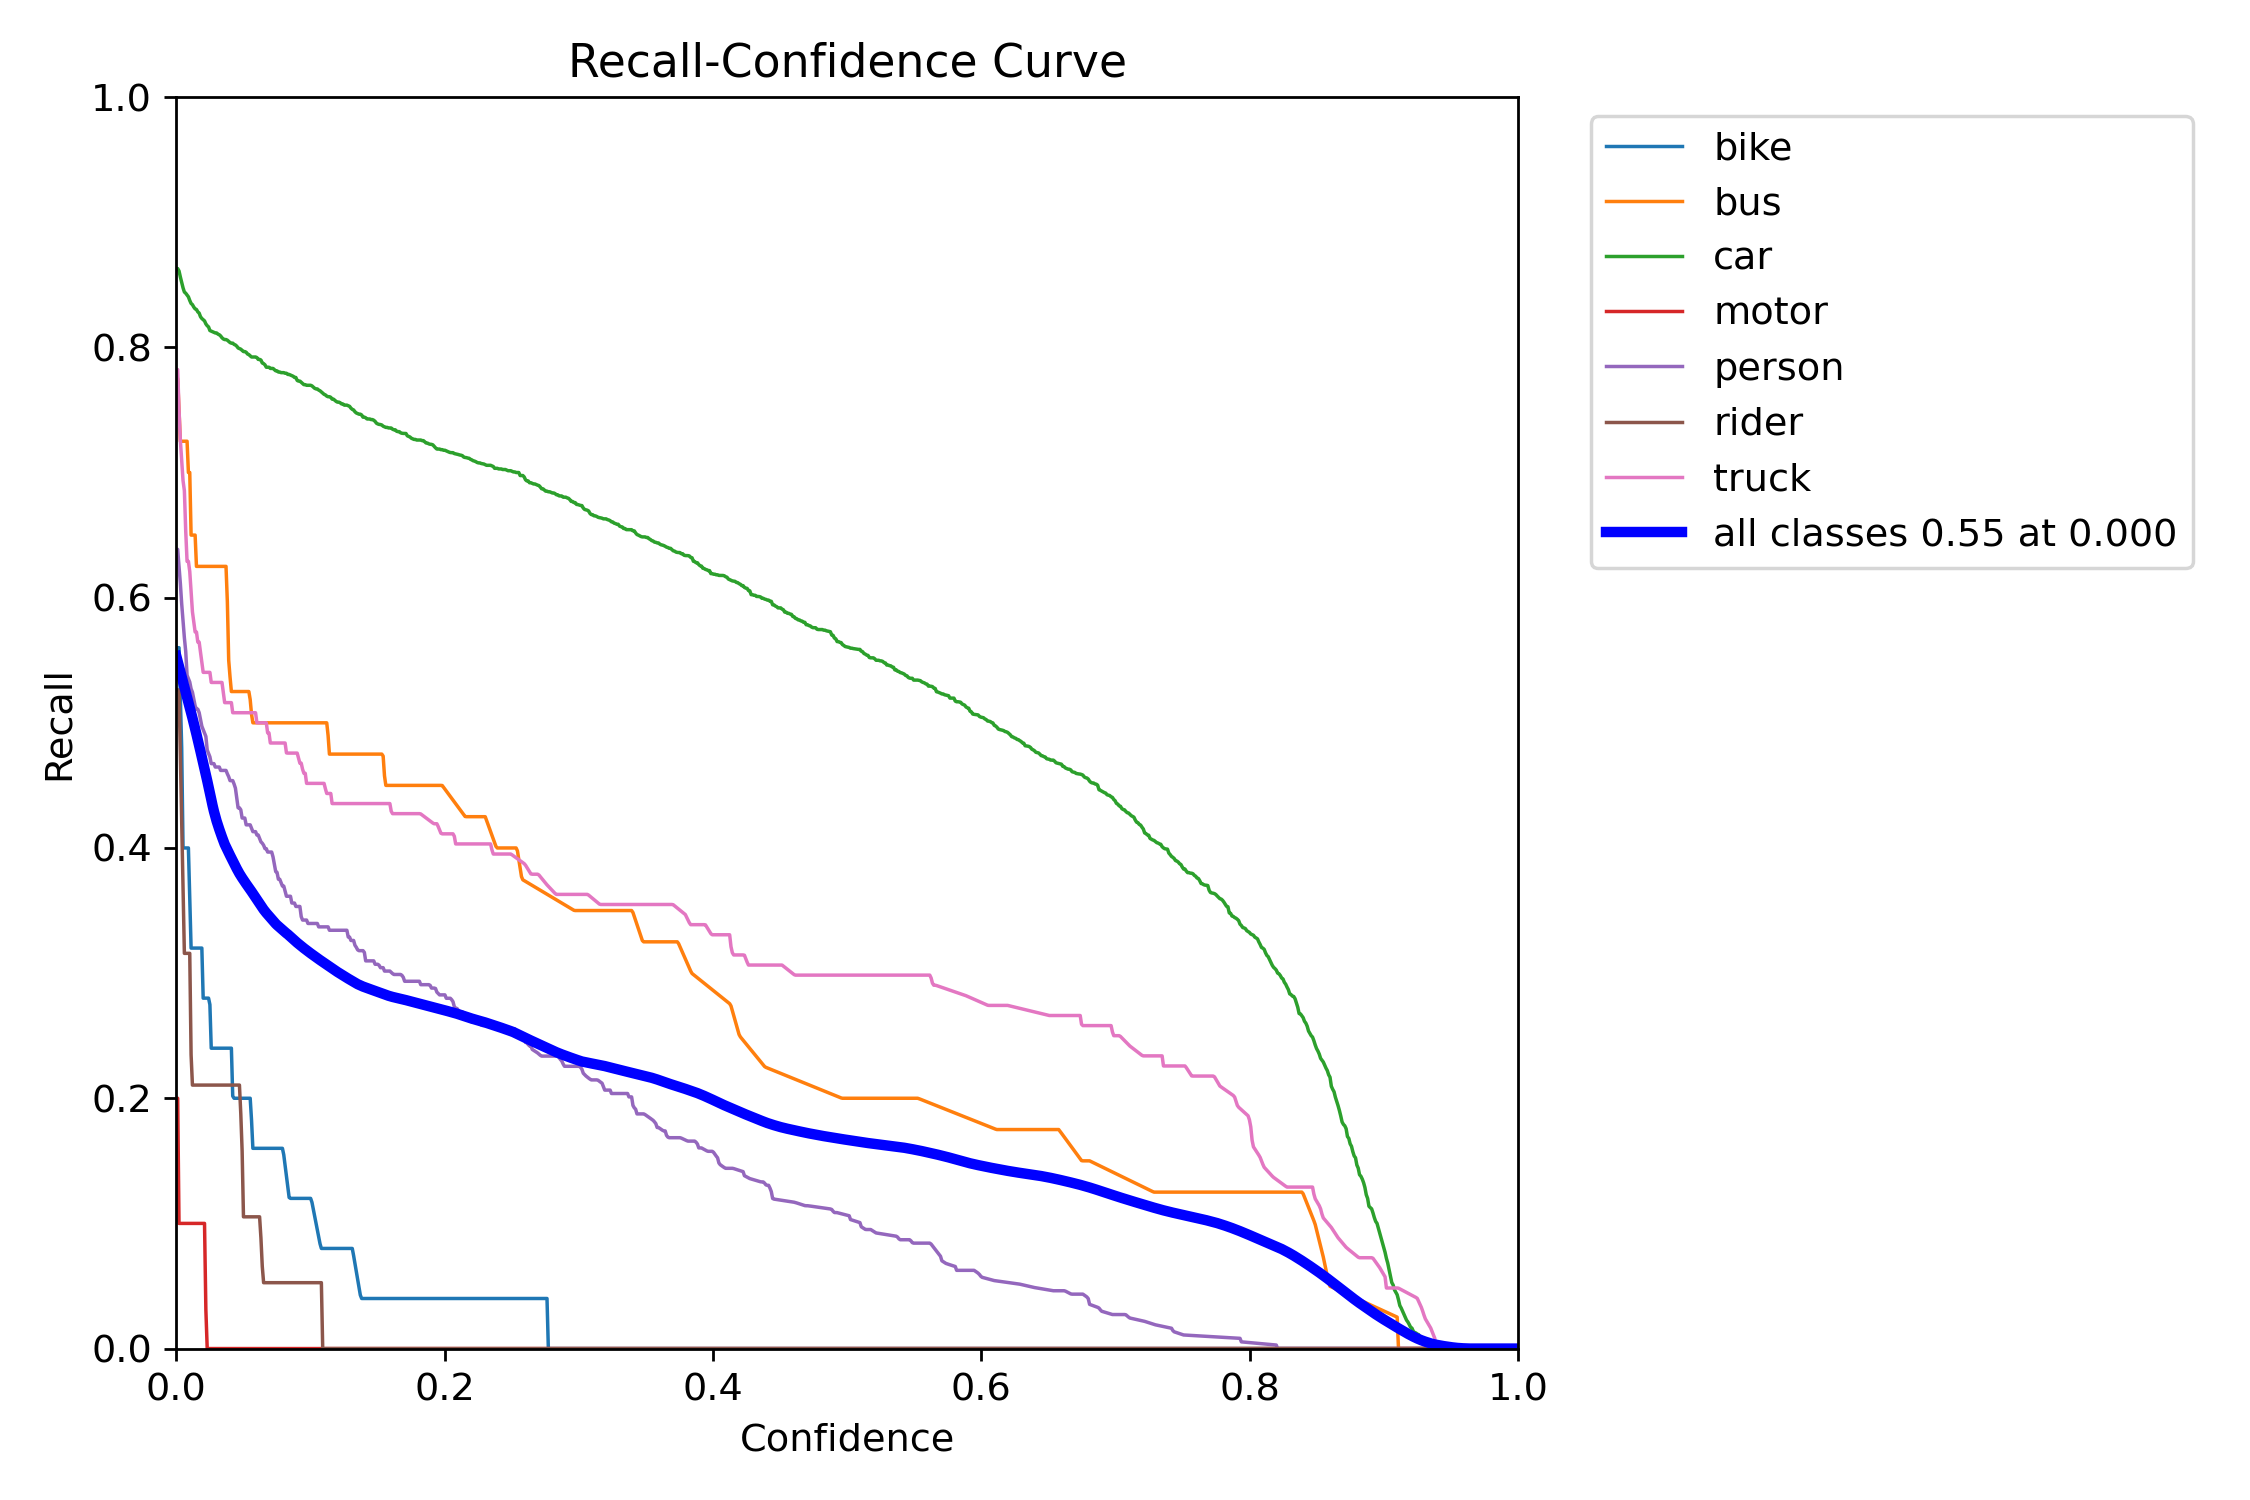

In [17]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/R_curve.png', width=1000)

Visualization

/content


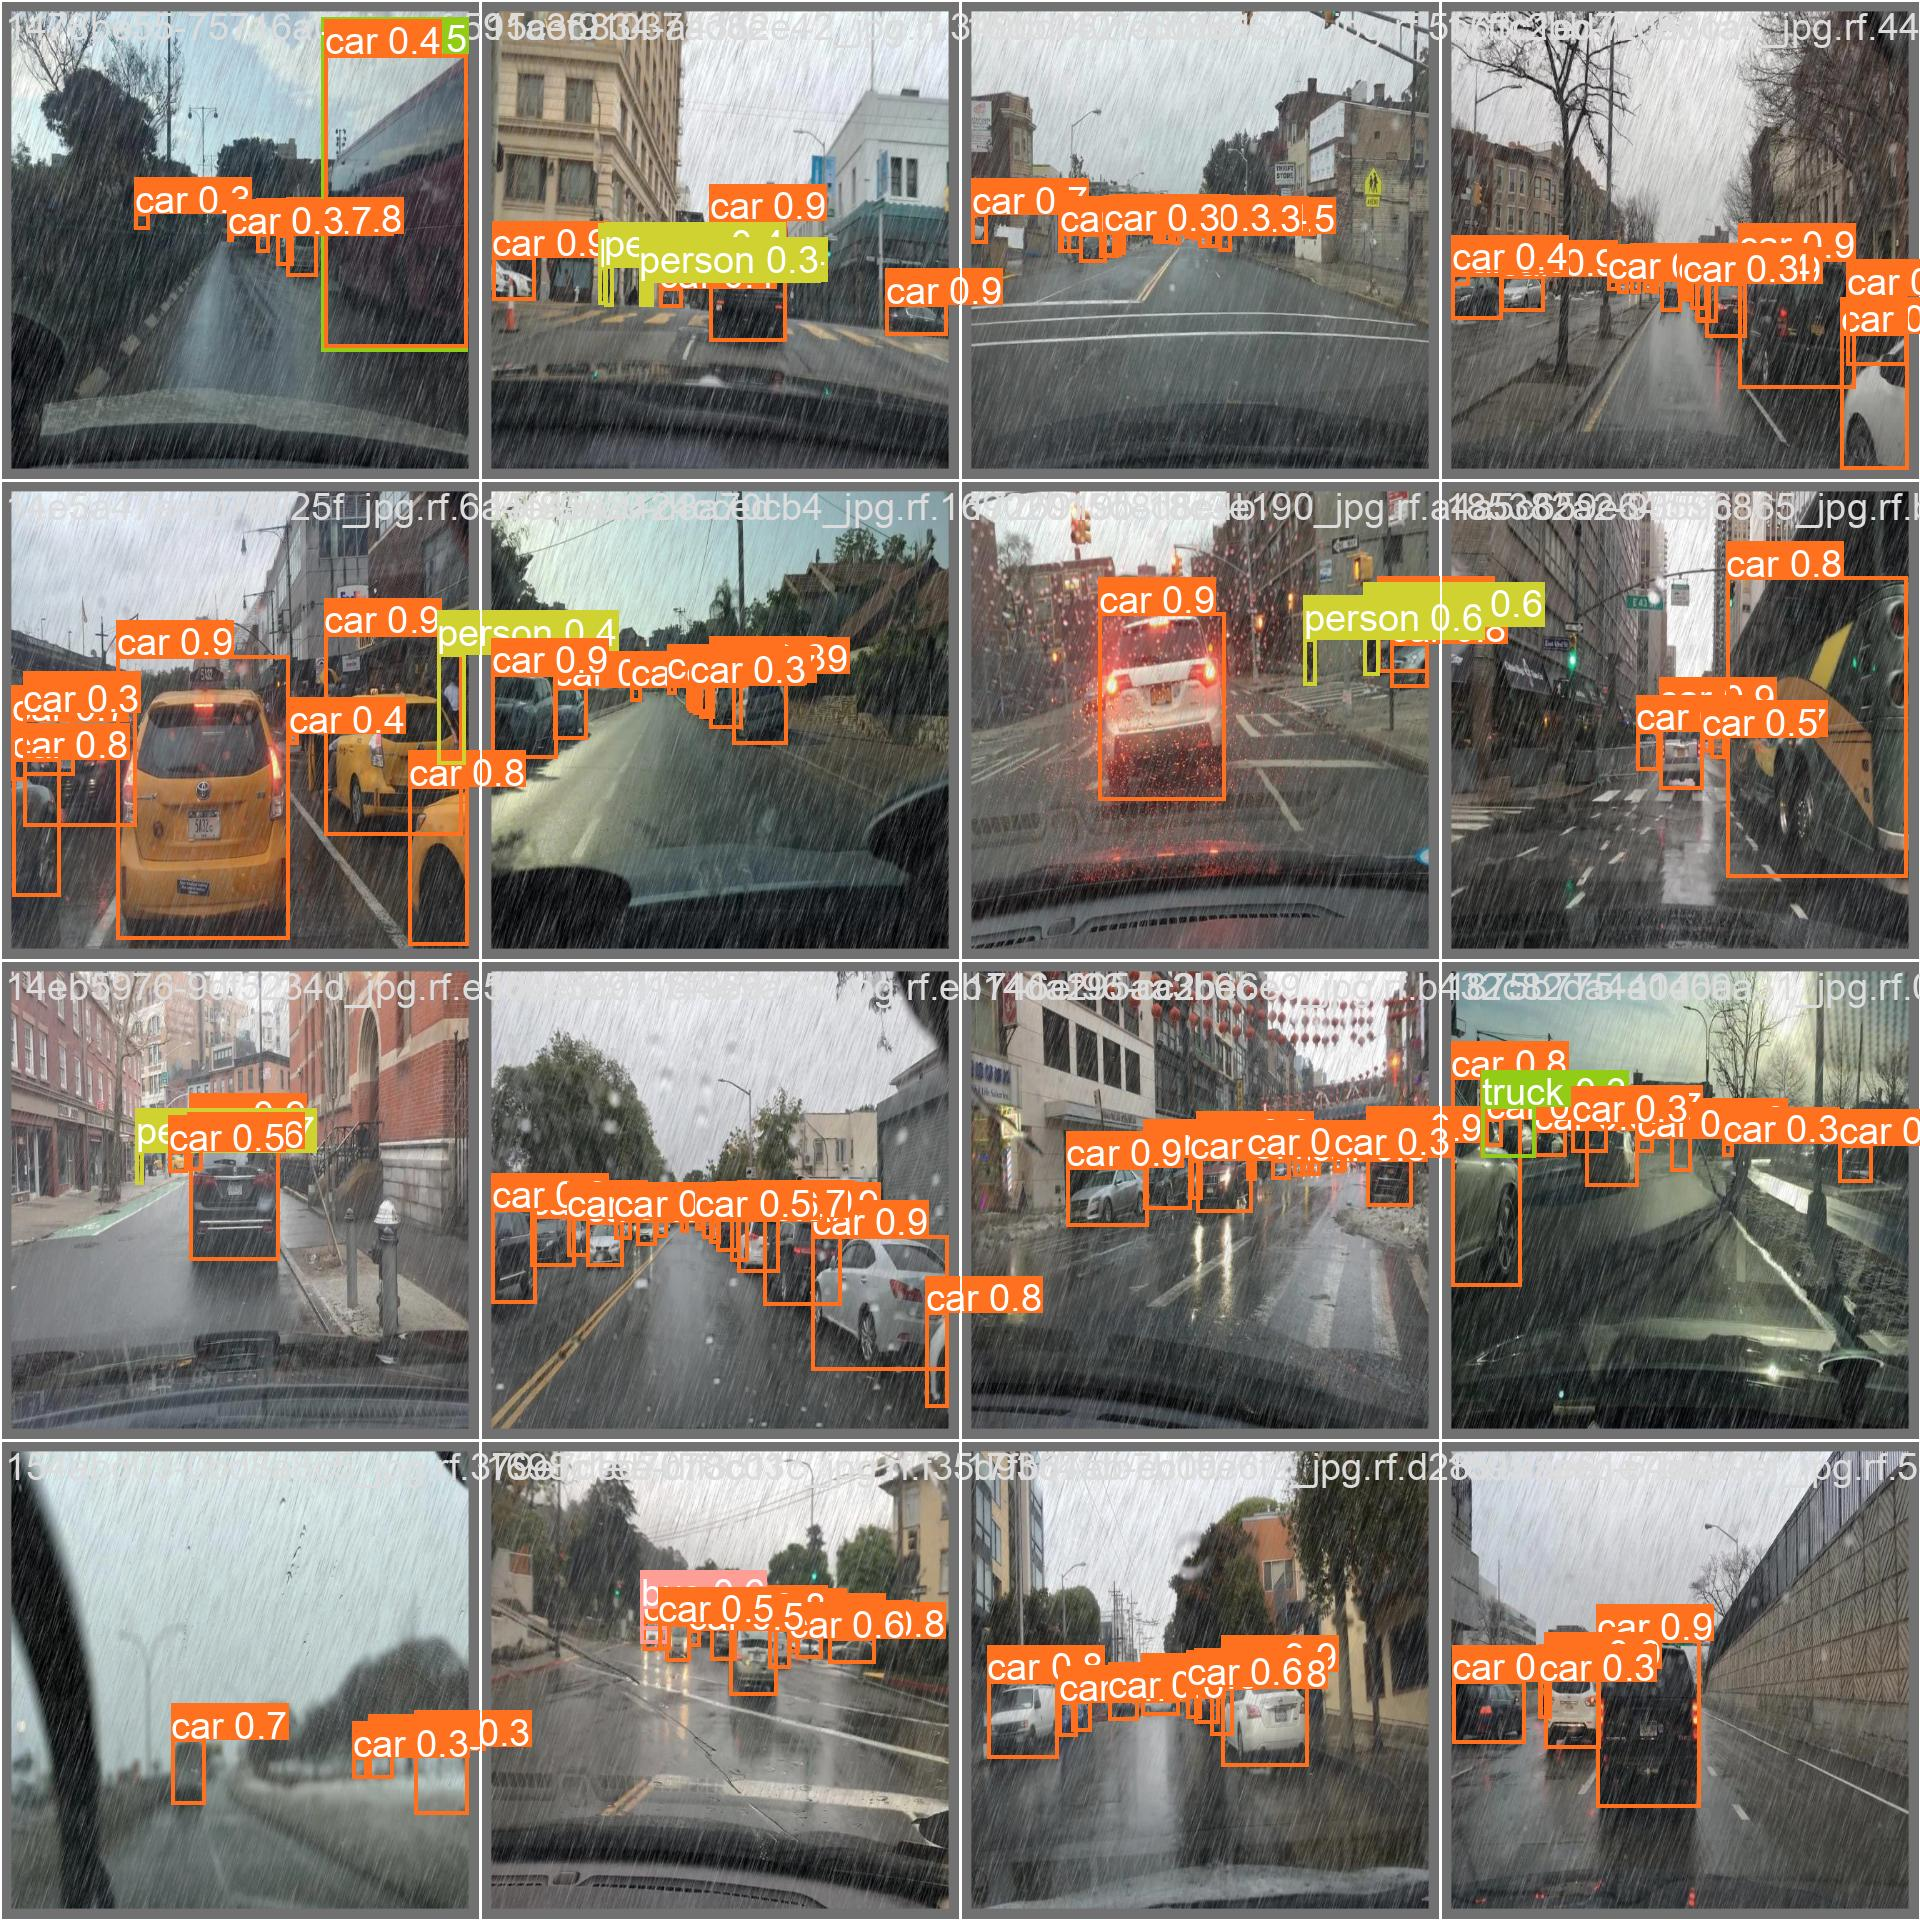

In [21]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train3/val_batch2_pred.jpg', width=1000)